In [4]:
#files failed processing: 300to470

import awkward as ak
import numpy as np
import time
import coffea
import pickle

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from plugins import handleData

# redirector = 'root://xcache/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True, data = False)
# events = NanoEventsFactory.from_root('root://xcache//store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()
# print(events.fields)

# import uproot
# ### uproot notation
# qcd_mc = uproot.open(list(files.values())[-1][0])
# qcd_mc.keys()
# uprootevents = qcd_mc['Events']
# # uprootevents.keys('HLT_PFJet*')
# uprootevents.keys('*Jet*')
# uprootevents.show()

0.7.21


In [5]:
from plugins import *
from trijetProcessor import makeTrijetHists
from dask.distributed import Client


data = False
winterfell = False
dask = True
btag_str = 'bbloose'
processor = makeTrijetHists(data = data, btag = btag_str)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"

fname = 'coffeaOutput/trijetHistsTest_{}_pt{}_eta{}_{}.pkl'.format(datastring, str(processor.ptcut), str(processor.etacut), processor.btag)


0.7.21
2.6.3
Data:  False  gen  True


In [3]:
result = runCoffeaJob(processor, jsonFile = filename, winterfell = winterfell, dask = dask, testing = True, data = not processor.do_gen)
with open(fname, "wb") as f:
    pickle.dump( result, f)

Era:  UL16
Era:  UL17NanoAODv9
Era:  UL18NanoAODv9
dataset =  /QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM
dataset =  /QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM
dataset =  /QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM
dataset =  /QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM
dataset =  /QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM
dataset =  /QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM
dataset =  /QCD_Pt_170to300_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM
dataset =  /QCD_Pt_170to300_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realisti

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
with open(fname, "rb") as f:
    result = pickle.load( f )
    
os_path = 'plots/selectionStudies/'+btag_str+'/'
checkdir(os_path)
print(result[1])

{'bytesread': 1502239896, 'columns': ['nSubGenJetAK8', 'FatJet_msoftdrop', 'GenJetAK8_phi', 'FatJet_genJetAK8Idx', 'GenJetAK8_pt', 'FatJet_btagCSVV2', 'FatJet_phi', 'GenJetAK8_hadronFlavour', 'SubGenJetAK8_mass', 'GenJetAK8_eta', 'SubGenJetAK8_pt', 'GenJetAK8_mass', 'FatJet_pt', 'PV_npvsGood', 'nFatJet', 'FatJet_mass', 'SubGenJetAK8_eta', 'GenJetAK8_partonFlavour', 'nGenJetAK8', 'SubGenJetAK8_phi', 'FatJet_eta'], 'entries': 11423033, 'processtime': 4232.056876897812, 'chunks': 131}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


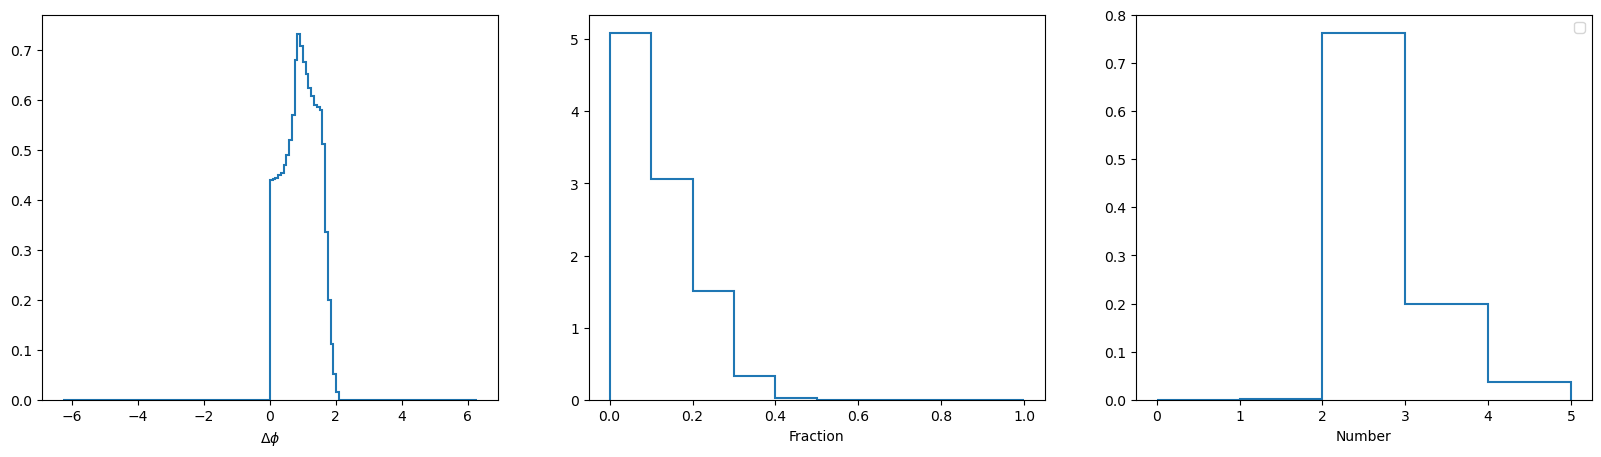

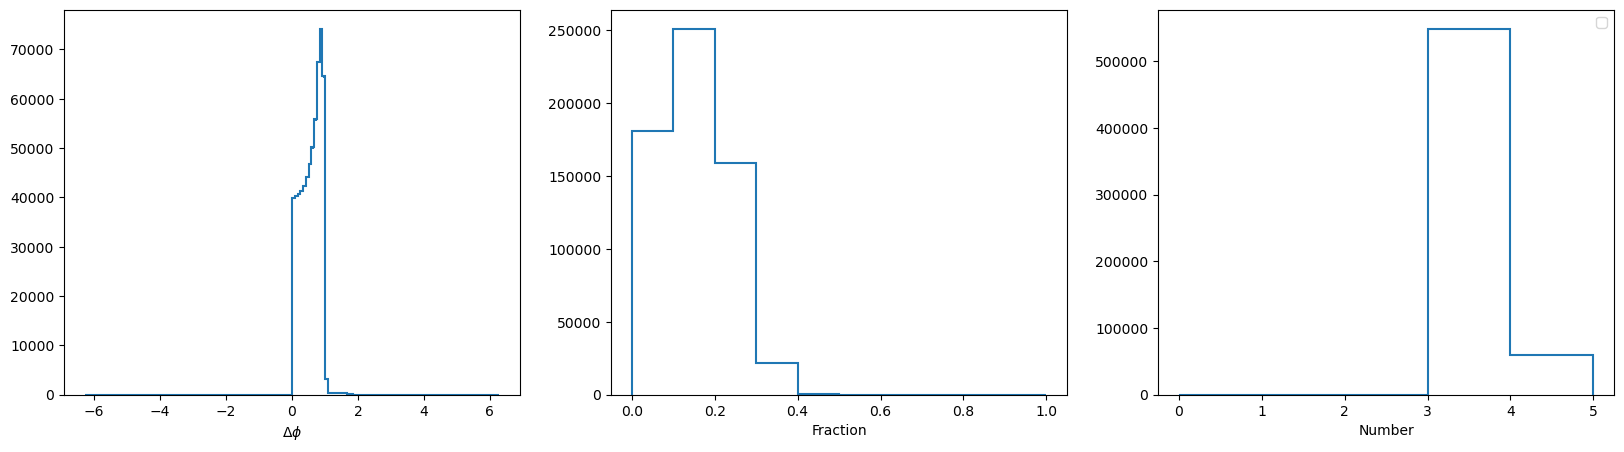

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
result = result[0]
if not data:
    fig, axs = plt.subplots(1, 3)
    result['dphimin_gen'][{'dataset':sum}].plot1d(ax = axs[0], density=True)
    result['asymm_gen'][{'dataset':sum}].plot1d(ax=axs[1], density=True)
    result['njet_gen'][{'dataset':sum}].plot1d(ax=axs[2], density=True)
    plt.legend()

fig, axs = plt.subplots(1, 3)
result['dphimin_reco'][{'dataset':sum}].plot1d(ax = axs[0])
result['asymm_reco'][{'dataset':sum}].plot1d(ax=axs[1])
result['njet_reco'][{'dataset':sum}].plot1d(ax=axs[2])
plt.legend()

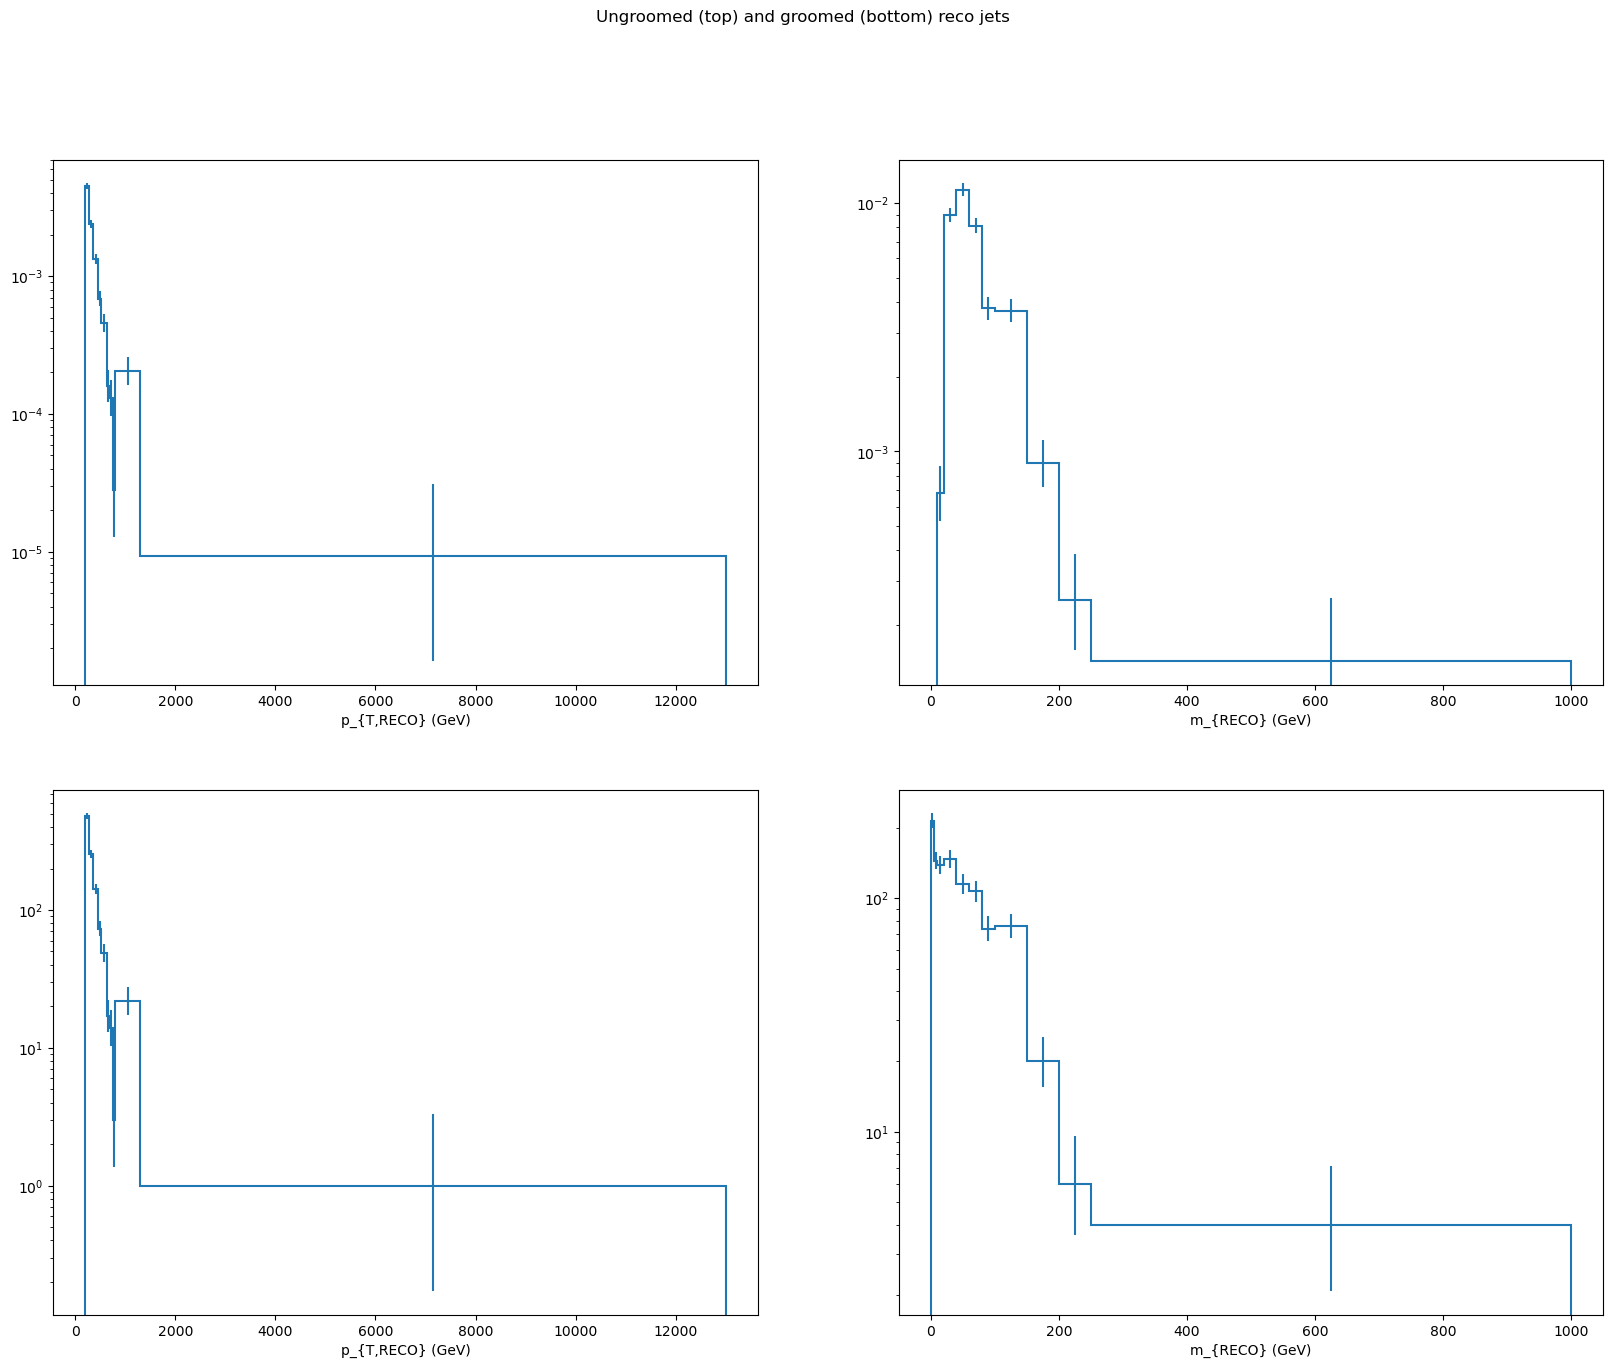

In [22]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], density=True)
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1], density=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0])
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[0,1].set_yscale('log')

### Plotting Response Matrices

In [25]:
if not data:
    response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
    response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()
    nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape
    print(response_matrix_u_values.shape)
    response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
    print(ak.max(response_matrix_u_final))
    response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
    
    

(10, 11, 10, 21)
46.0


In [ ]:
nbins_ptreco = len(result['response_matrix_u'].project("ptreco").values())
nbins_ptgen = len(result['response_matrix_u'].project("ptgen").values())
print(result['response_matrix_u'].project("ptgen").values())
print(result['response_matrix_u'].__getitem__('ptreco'))
tot_bins = nbins_ptreco*nbins_ptgen
print(tot_bins)
for i in np.arange(nbins_ptreco):
    for j in np.arange(nbins_ptgen):
        result['response_matrix_u'][{'dataset':sum, 'ptreco':i, 'ptgen':j}].plot2d()
        plt.show()

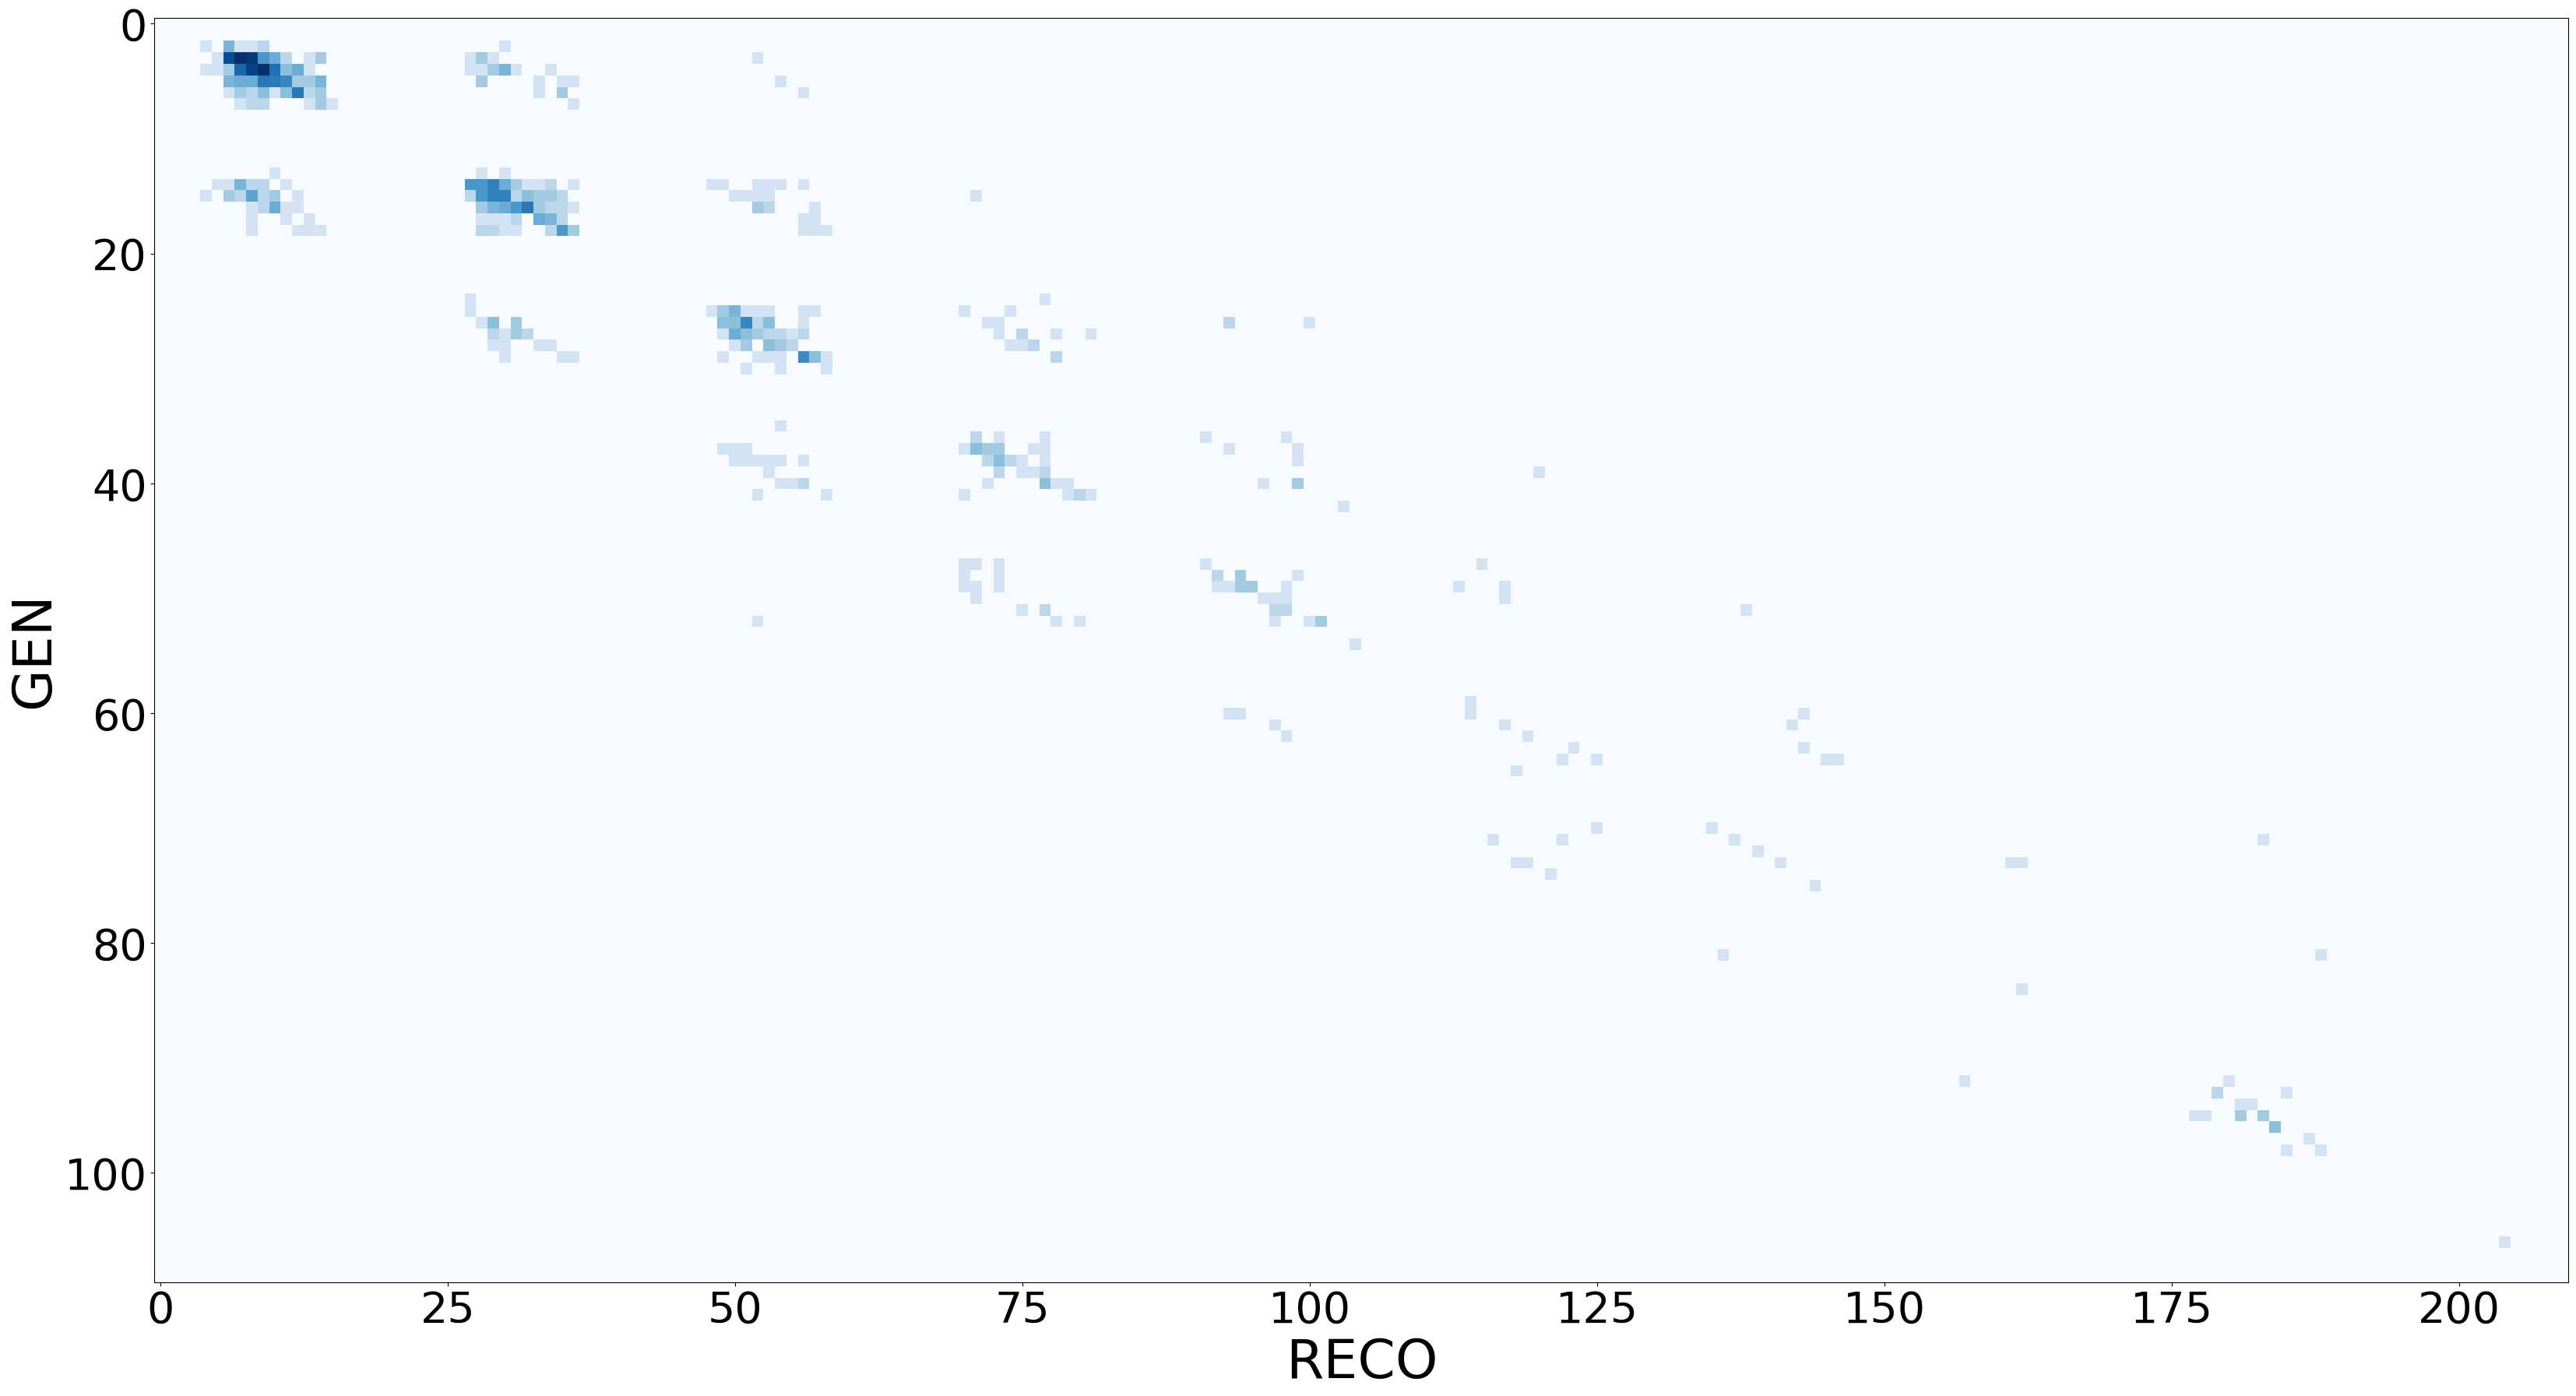

In [26]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( np.log(response_matrix_u_final+1), aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

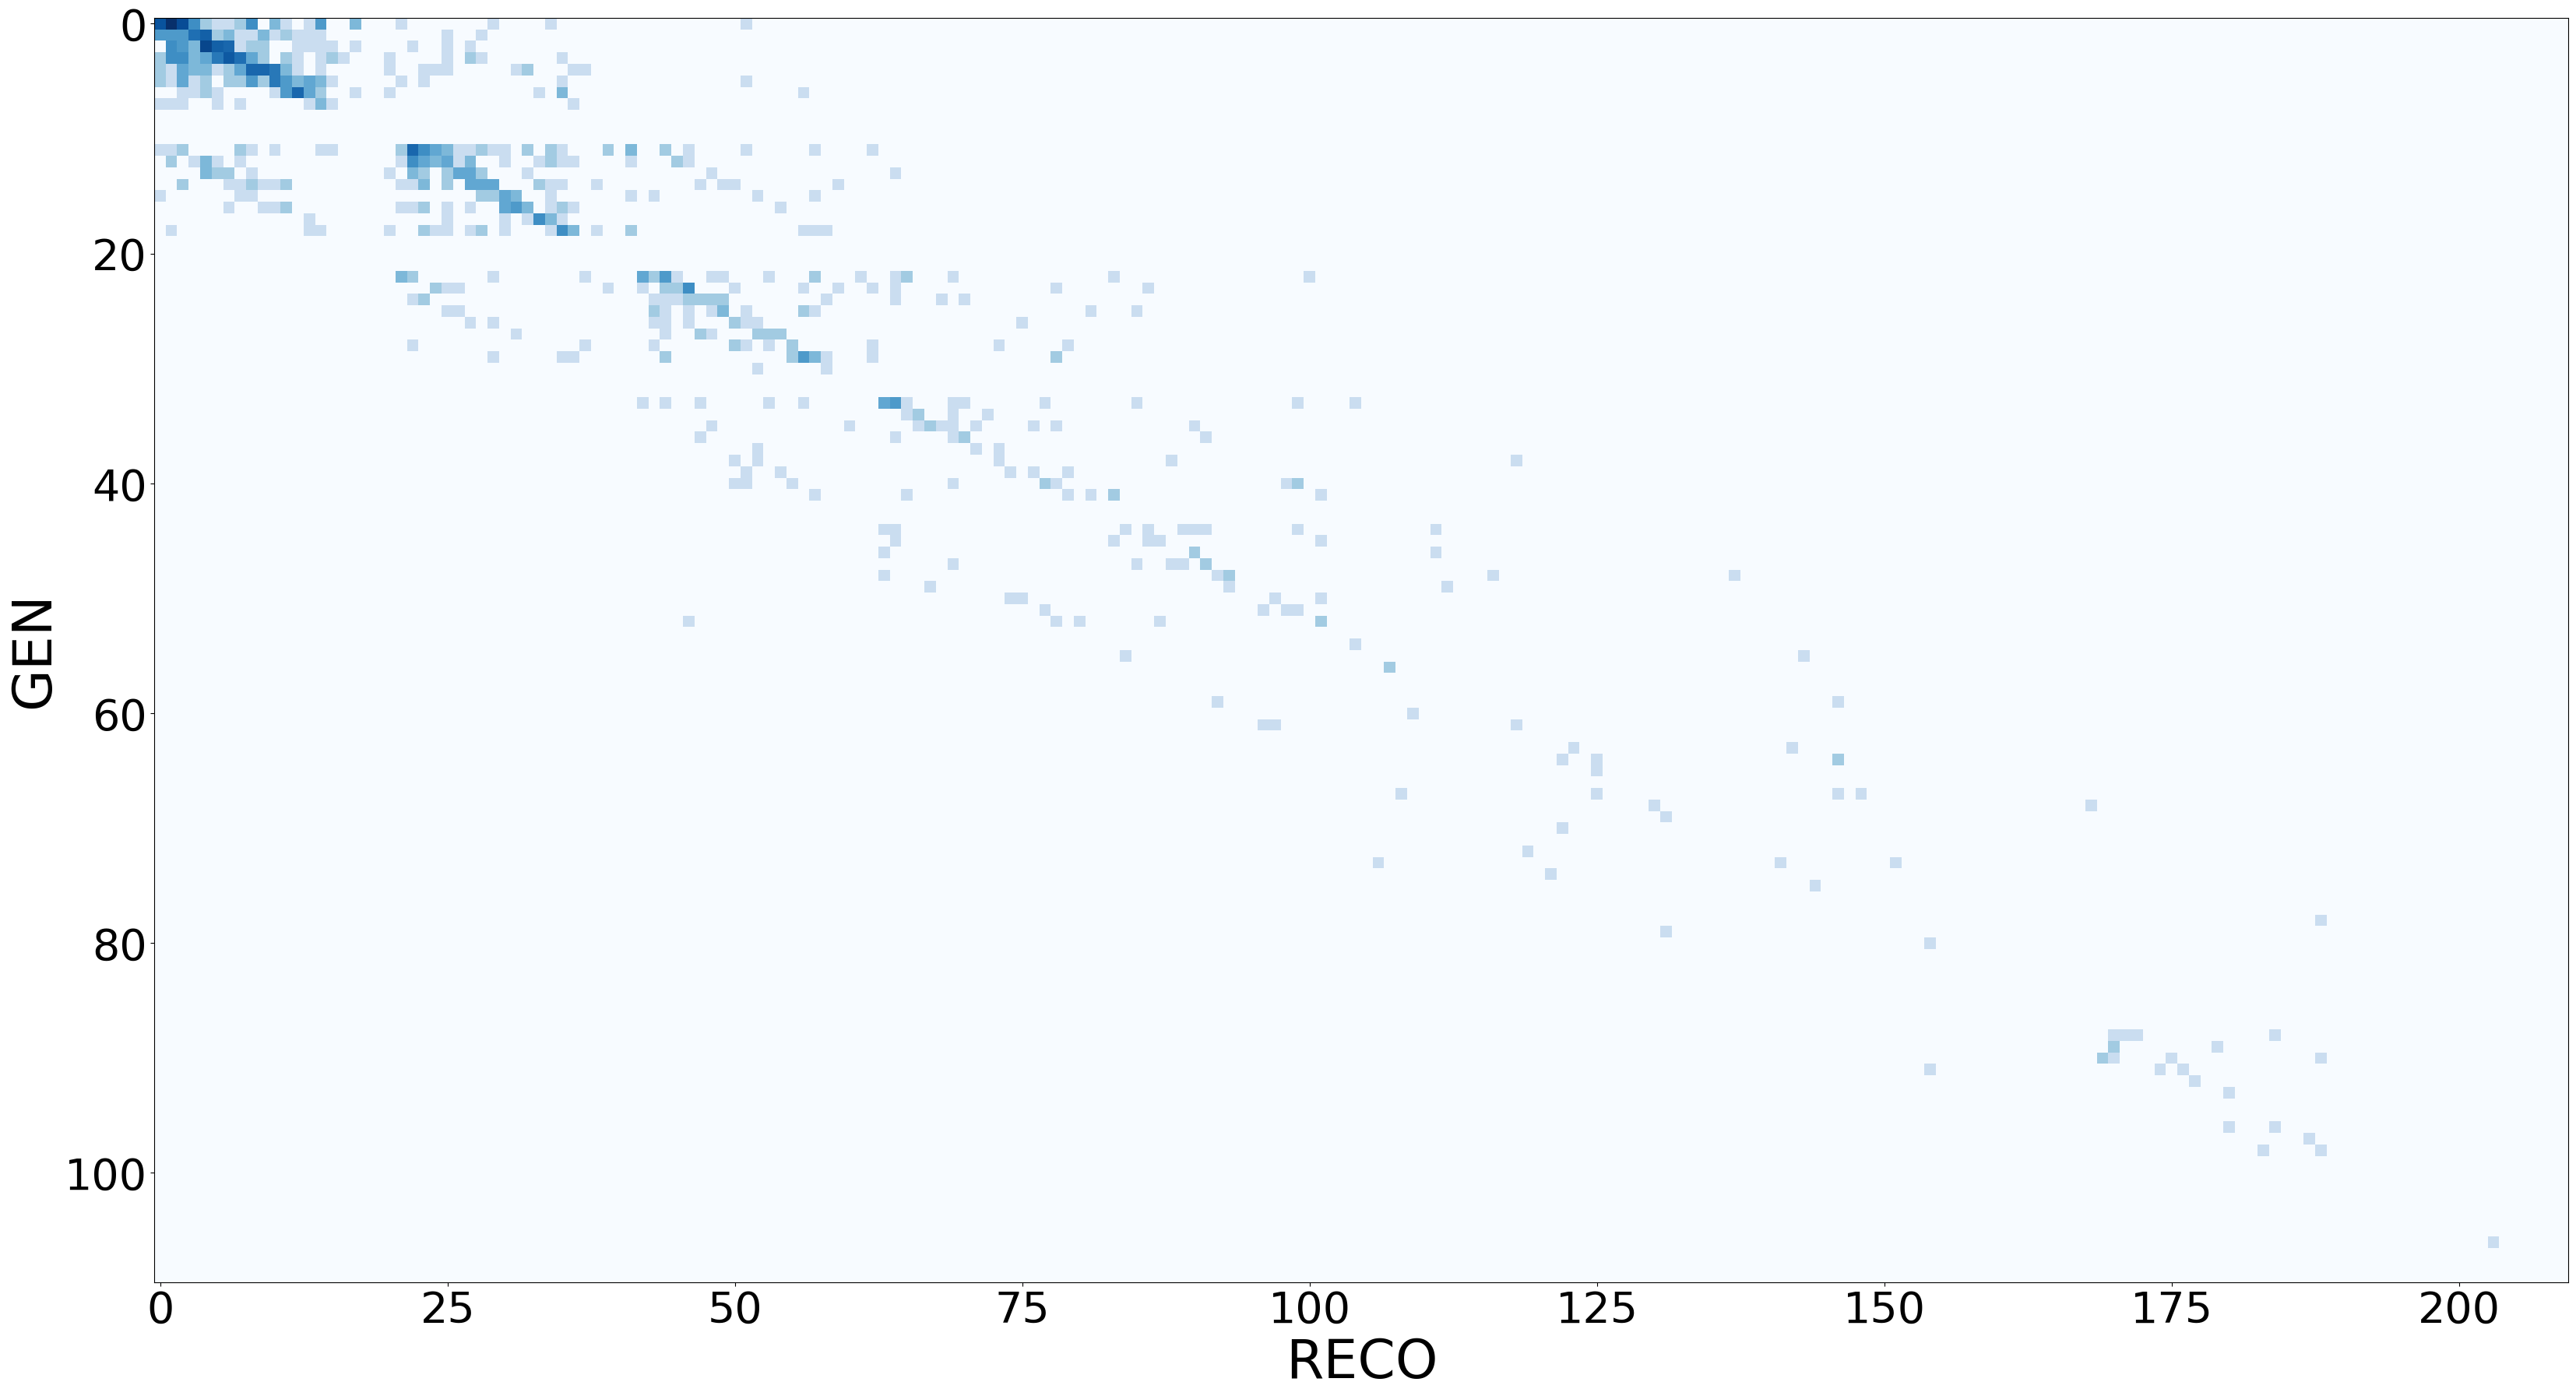

In [27]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

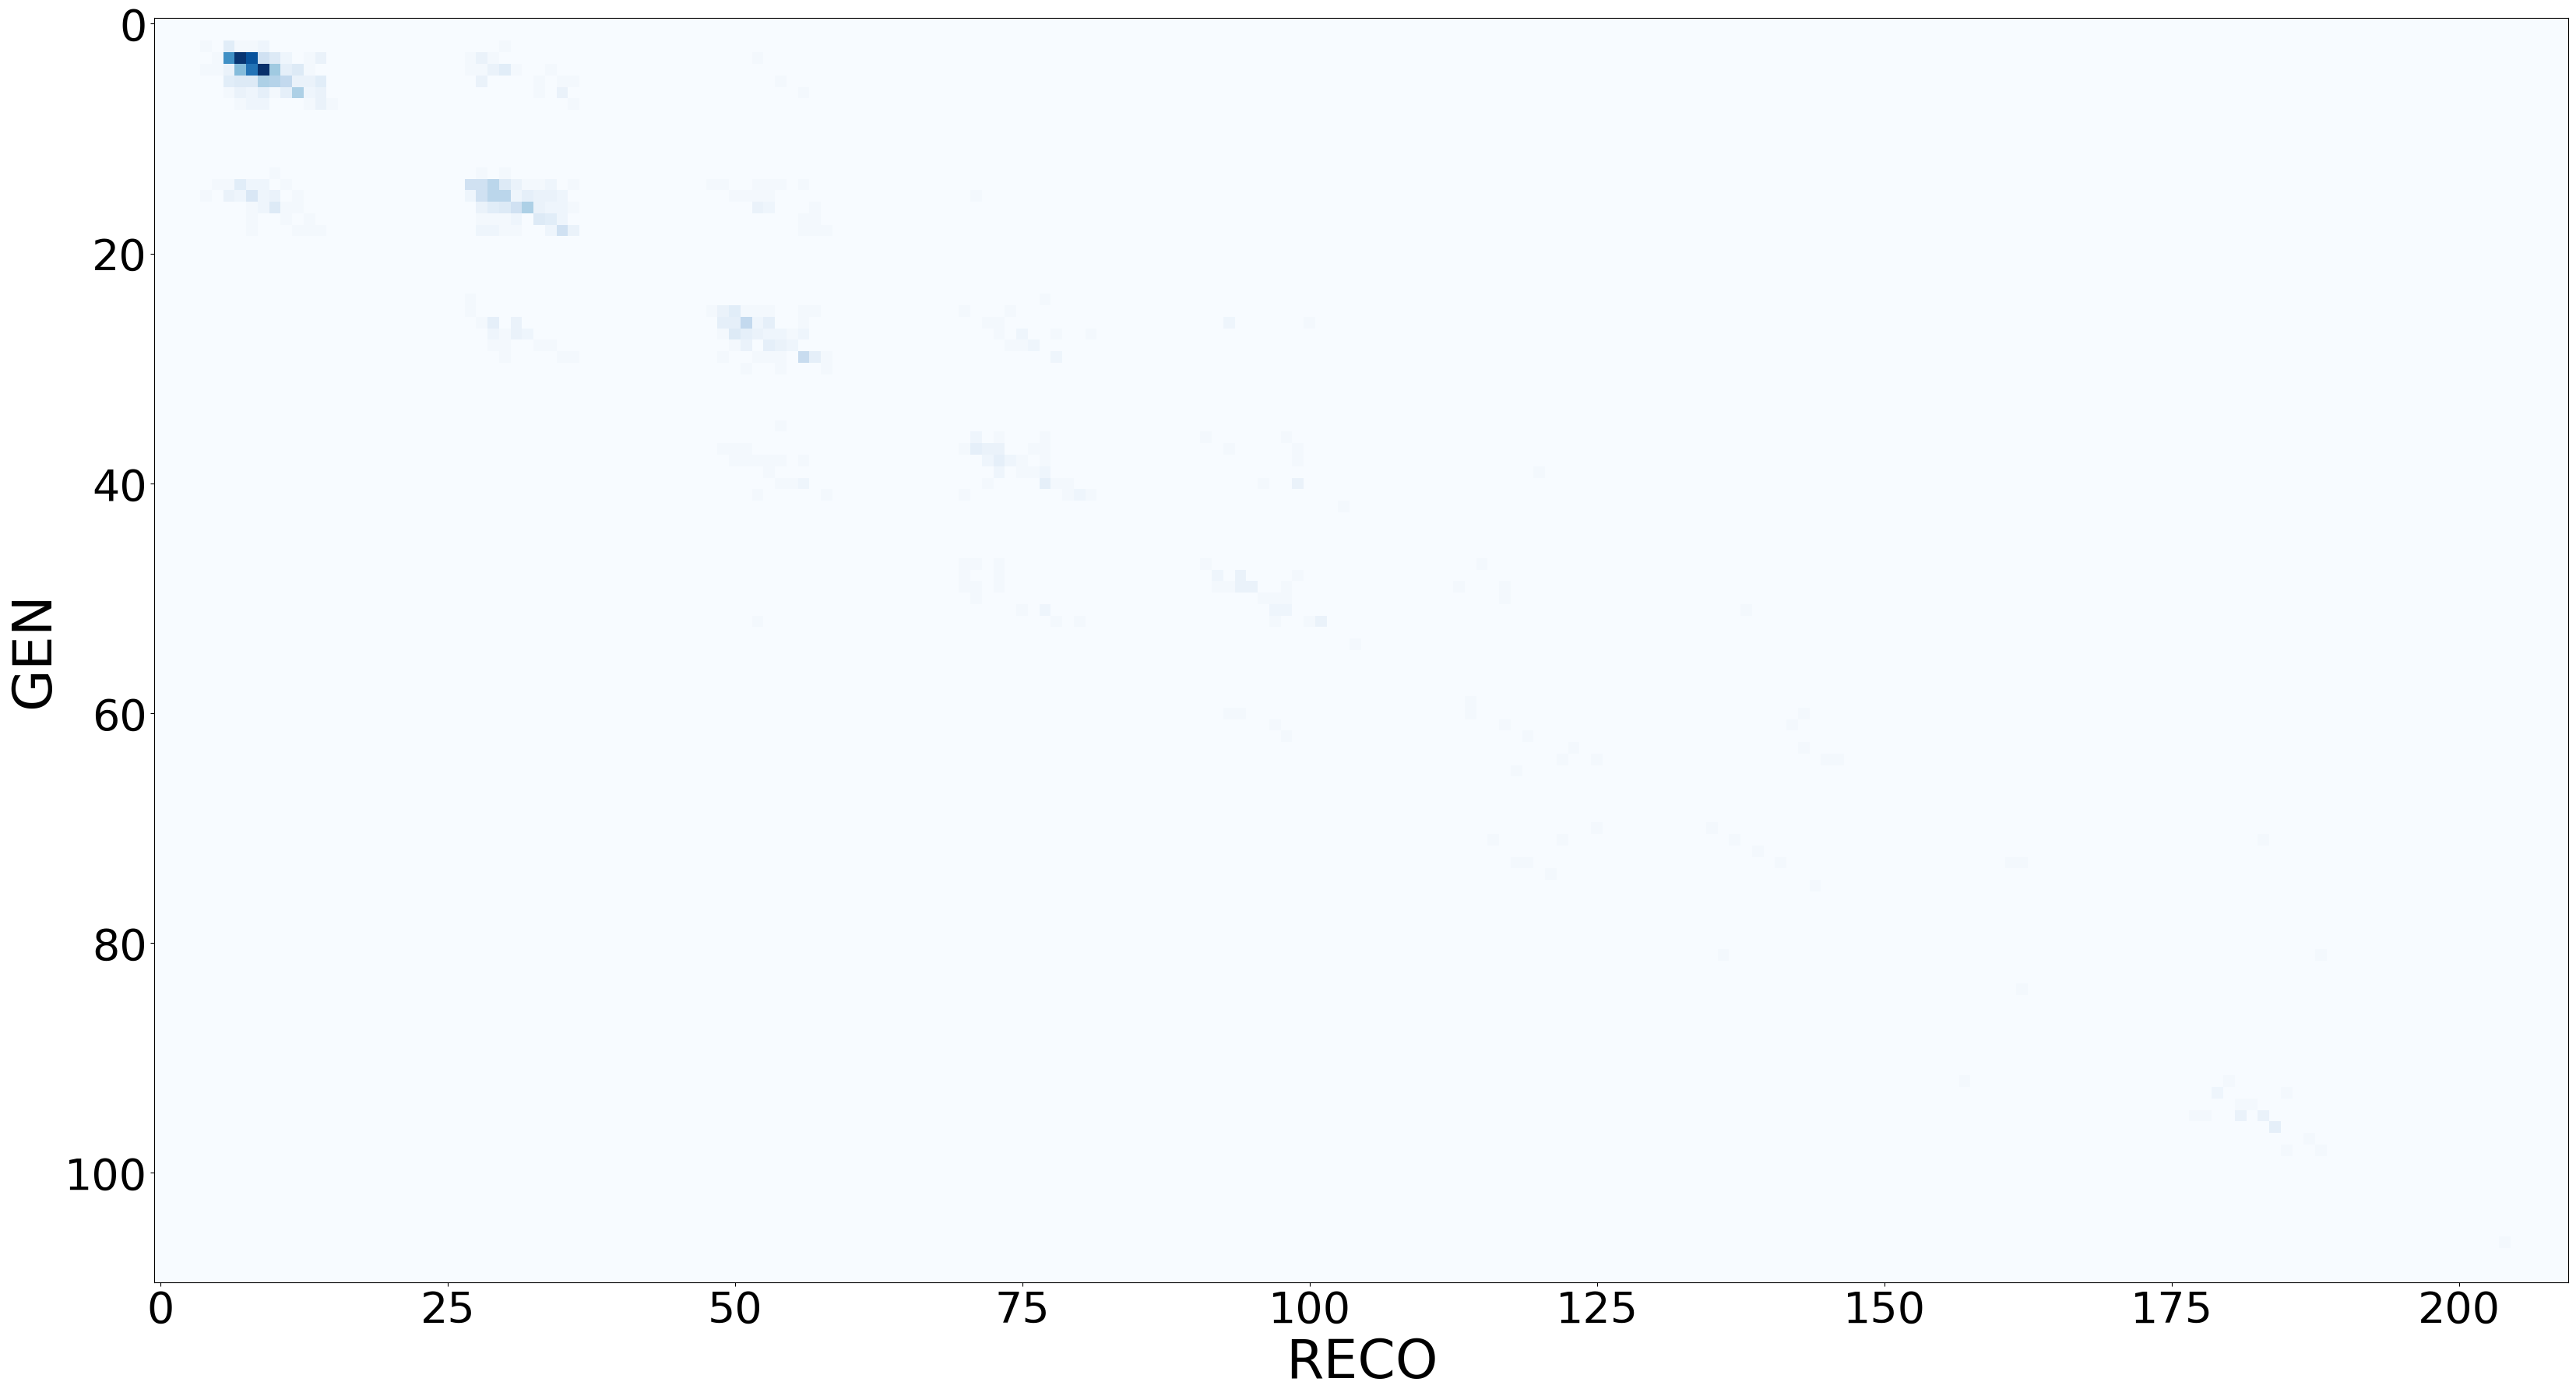

In [28]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

In [ ]:


plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
grid = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
grid00 = grid[0,0].subgridspec(4,1, wspace=0, hspace=0)
grid01 = grid[0,1].subgridspec(4,1, wspace=0, hspace=0)
grid10 = grid[1,0].subgridspec(4,1, wspace=0, hspace=0)
grid11 = grid[1,1].subgridspec(4,1, wspace=0, hspace=0)
        
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptgen')
denominator = result['jet_pt'].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid00[:-1, :])
subplot_ax = fig.add_subplot(grid00[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt all jets(GeV)")
plt.ylabel("Gluon fraction")

numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet3'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid01[:-1, :])
subplot_ax = fig.add_subplot(grid01[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet3 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet2'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet2'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid10[:-1, :])
subplot_ax = fig.add_subplot(grid10[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet2 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet1'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet1'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid11[:-1, :])
subplot_ax = fig.add_subplot(grid11[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet1 (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')
plt.savefig(os_path + "gluonPtFrac.png")

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.gcf()
grid = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
grid00 = grid[0,0].subgridspec(4,1, wspace=0, hspace=0)
grid01 = grid[0,1].subgridspec(4,1, wspace=0, hspace=0)
grid10 = grid[1,0].subgridspec(4,1, wspace=0, hspace=0)
grid11 = grid[1,1].subgridspec(4,1, wspace=0, hspace=0)

numerator = result['jet_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['jet_eta'].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid00[:-1, :])
subplot_ax = fig.add_subplot(grid00[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta all jets(GeV)")
plt.ylabel("Gluon fraction")

numerator = result['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta')
denominator = result['jet_eta'][{'jetNumb':'jet3'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid01[:-1, :])
subplot_ax = fig.add_subplot(grid01[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet3 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet2'}].project('eta')
denominator = result['jet_eta'][{'jetNumb':'jet2'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid10[:-1, :])
subplot_ax = fig.add_subplot(grid10[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet2 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet1'}].project('eta')
denominator = result['jet_eta'][{'jetNumb':'jet1'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid11[:-1, :])
subplot_ax = fig.add_subplot(grid11[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet1 (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of eta')
plt.savefig(os_path+'/gluonEtaFrac' + ".png")

In [ ]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)


fig, axs = plt.subplots(1, 3)
result['jet_mass'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['jet_pt'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['jet_eta'][{'jetNumb':sum, 'dataset':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

print(axs)

fig.suptitle('Trijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/allJetPtEtaPhi_partons' + ".png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,0], overlay='partonFlav')
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,1], overlay='partonFlav')
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,2], overlay='partonFlav')
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")

In [6]:
# plt.rcParams["figure.figsize"] = (20,5)


# fig, axs = plt.subplots(1, 3)
print(result['jet_mass'][{'jetNumb':sum, 'dataset':sum}])
result['jet_mass'][{'dataset':sum, "partonFlav":sum}].plot1d(density=True, overlay='jetNumb')
plt.legend()
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet mass (GeV)")

In [ ]:
# plot mass after summing over partons

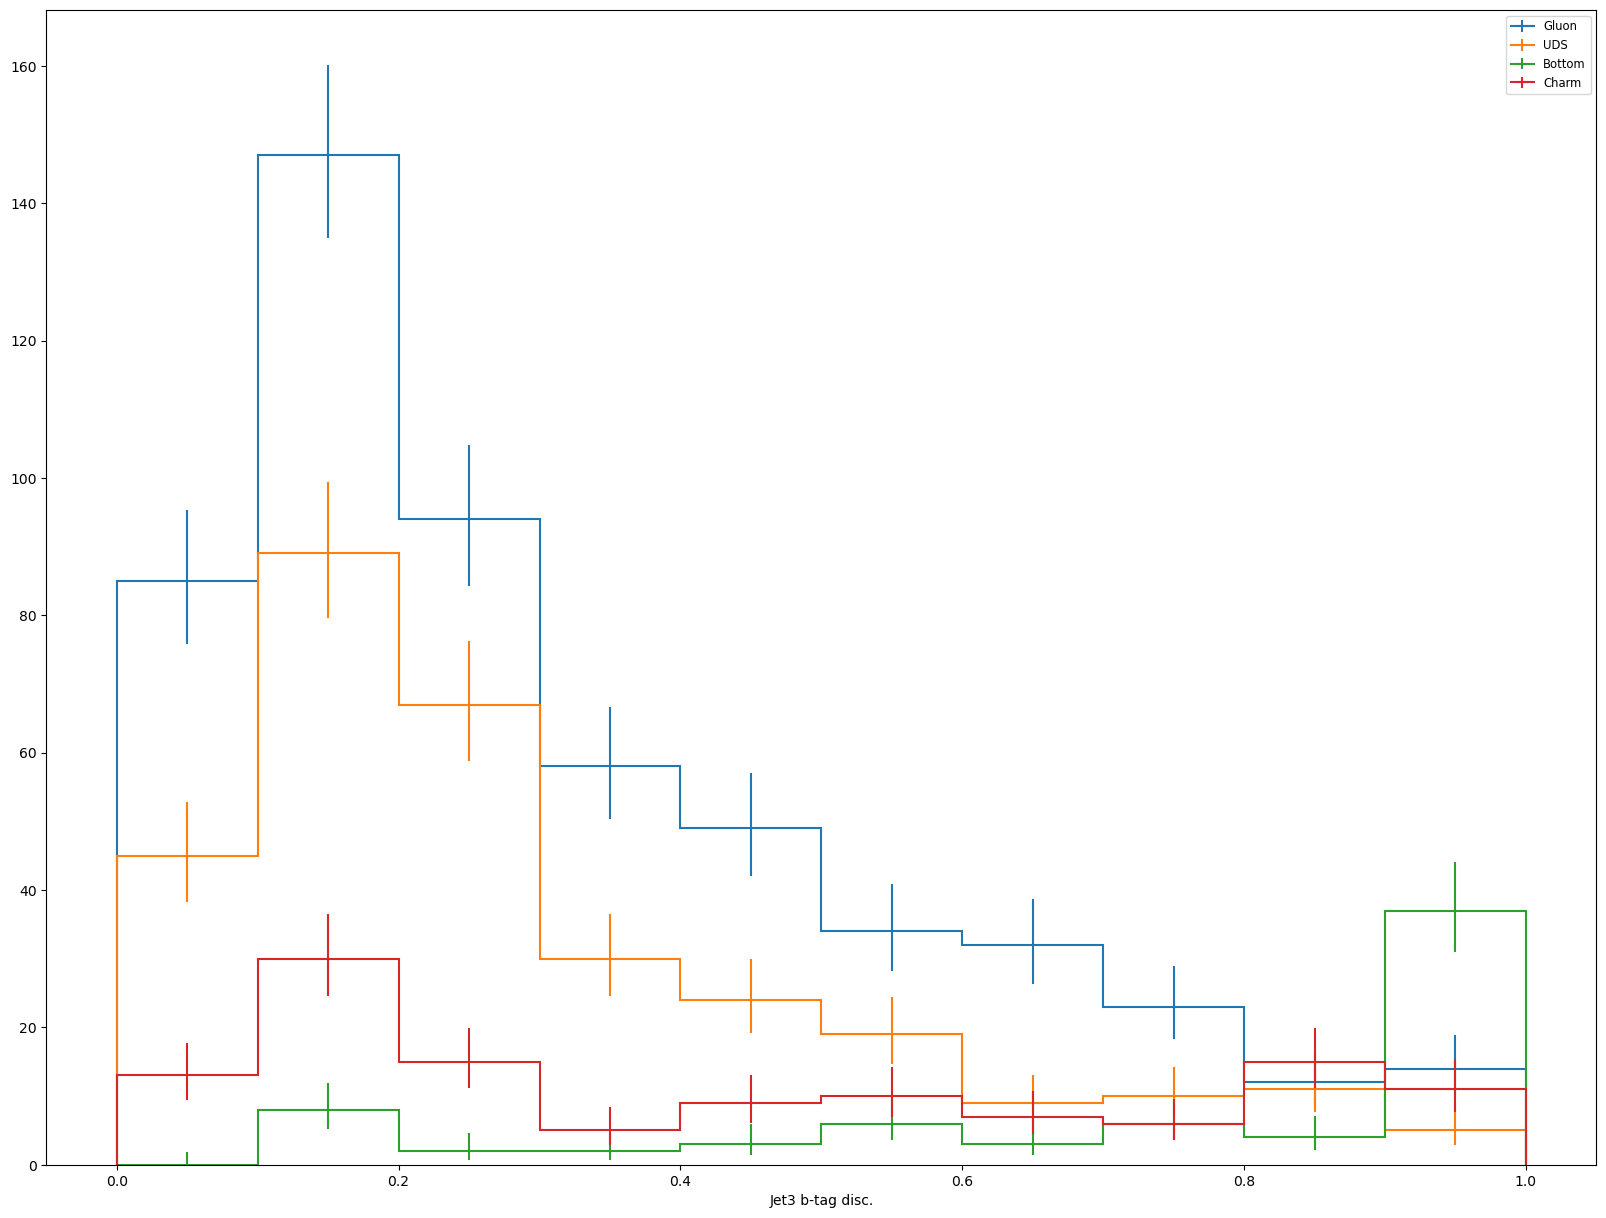

In [27]:
fig, ax = plt.subplots(1, 1)
result['btag'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(overlay="partonFlav")
ax.set_xlabel("Jet3 b-tag disc.")
plt.legend()
#can do an anti b-tag --> inverse of recommendation

In [28]:
njets=result['cutflow']['n3Jets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

defaultdict_accumulator(<class 'int'>, {'misses': 1079663, 'nGluonJets': 548, 'n3Jets': 1053, 'chunks': 128})
Gluon purity: 0.5204178537511871


#plot pt, eta, phi, fake rate, pt efficiency, gluon purity for difference selections with b tags for all jets 
#and each individual jet in the 3 jets